<a href="https://colab.research.google.com/github/TomDataAnalytics333/data-analysis-studies/blob/main/Visualiza%C3%A7%C3%A3o_de_dados_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=984be06ae30dec2a3acf40227490b1c9e178734b5f5b9186c1ed40b8feb8fae1
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.types import IntegerType, FloatType, DoubleType

In [ ]:

path = '/content/spotify.csv'

In [ ]:
spark = (SparkSession.builder
                     .master('local')
                     .appName('spotify')
                     .config('spark.ui.port', '4050')
                     .getOrCreate())

In [ ]:
spark

In [ ]:
#IMPORTEM O DATAFRAME DO DRIVE
df = (
    spark.read
         .format('csv')
         .option('delimiter', ',')
         .option('header', 'true')
         .option('inferschema', 'true')
         .load(path)
)

#Tratamento

In [ ]:
#Shape do dataframa
print(f'({df.count()}, {len(df.columns)})')

(18835, 16)


In [ ]:
#Olhando o esquema
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- song_name: string (nullable = true)
 |-- song_popularity: string (nullable = true)
 |-- song_duration_ms: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- key: double (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- audio_mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- time_signature: string (nullable = true)
 |-- audio_valence: double (nullable = true)



In [ ]:
#Olhando o dataframe
df.show(truncate=False)

+---+--------------------------+---------------+----------------+----------------------+-----------------------+------------------+---------------------+----+-------------------+-------------------+----------+--------------------+-------+--------------+------------------+
|_c0|song_name                 |song_popularity|song_duration_ms|acousticness          |danceability           |energy            |instrumentalness     |key |liveness           |loudness           |audio_mode|speechiness         |tempo  |time_signature|audio_valence     |
+---+--------------------------+---------------+----------------+----------------------+-----------------------+------------------+---------------------+----+-------------------+-------------------+----------+--------------------+-------+--------------+------------------+
|0  |Boulevard of Broken Dreams|73             |262333          |0.005520000000000001kg|0.496mol/L             |0.682             |2.94e-05             |8.0 |0.0589             |-4.

In [ ]:
#Dropando a coluna '_c0'
df = df.drop(F.col('_c0'))

In [ ]:
#Das 18835 linhas, nós só temos 13070 músicas, isso significa que existem músicas repetidas ou valores nulos
df.select("song_name").distinct().count()

13070

In [ ]:
# Selecionando a coluna "song_name" para identificar os valores duplicados
coluna = "song_name"

# Usando a função groupBy() para agrupar por valores únicos na coluna "song_name" e a função agg() com a função count() para contar a ocorrência de cada valor
contagem_por_valor = df.groupBy(coluna).agg(F.count("*").alias("contagem"))

# Usando a função filter() para filtrar apenas os valores duplicados com base na contagem
valores_duplicados = contagem_por_valor.filter(F.col("contagem") > 1)

# Exiba os valores duplicados
valores_duplicados.show(truncate=False)

+---------------------------------------------+--------+
|song_name                                    |contagem|
+---------------------------------------------+--------+
|Remedy                                       |2       |
|La Gota Fría                                 |2       |
|Magic Carpet Ride                            |2       |
|Heaven                                       |11      |
|Banquet                                      |3       |
|What Am I To Do                              |3       |
|I Know What I Am                             |2       |
|MIC Drop (feat. Desiigner) [Steve Aoki Remix]|2       |
|Sunday Afternoon                             |2       |
|TEST DRIVE                                   |5       |
|Push It                                      |3       |
|On My Way                                    |2       |
|No Promises (feat. Demi Lovato)              |3       |
|Beautiful (feat. Camila Cabello)             |11      |
|Me Dediqué a Perderte         

In [ ]:
# número de músicas duplicadas
valores_duplicados.count()
#Das 18835 linhas, nós só temos 13070 músicas, isso significa que existem músicas repetidas ou valores nulos
# existem 2896 nomes de músicas repetidos

2896

In [ ]:
# Usando a função agg() com a função sum() para somar os valores da coluna "contagem"
soma_contagem = valores_duplicados.agg(F.sum("contagem").alias("soma_contagem"))

# Resultado da soma
soma_contagem.show()

#A soma da coluna contagem resulta em 8661, vamos subtrair as 2896 músicas repetidas
# Dessa forma obtemos somente as "supostas" linhas repetidas que são 5765
# Supostas porque músicas diferentes podem ter o mesmo nome

+-------------+
|soma_contagem|
+-------------+
|         8661|
+-------------+



In [ ]:
# Mostrando as músicas com mesmo nome e ordenando por quantidade de músicas com mesmo nome
valores_duplicados.orderBy(F.desc("contagem")).show()

+--------------------+--------+
|           song_name|contagem|
+--------------------+--------+
|              Better|      21|
|FEFE (feat. Nicki...|      19|
|   MIA (feat. Drake)|      18|
|Taki Taki (with S...|      18|
|          No Stylist|      17|
|            Mo Bamba|      16|
|Promises (with Sa...|      16|
|Electricity (with...|      16|
|I Love It (& Lil ...|      16|
|Sunflower - Spide...|      16|
|             Lullaby|      15|
|        Love Someone|      14|
|          Be Alright|      14|
|ZEZE (feat. Travi...|      14|
|             Happier|      14|
|                Fall|      14|
|  Wake Up in the Sky|      14|
|             Noticed|      13|
|        This Feeling|      13|
|          SICKO MODE|      13|
+--------------------+--------+
only showing top 20 rows



In [ ]:
# Vamos verificar se nas músicas com mesmo nome, existem linhas repetidas
df.filter(F.col('song_name') == 'Better').show()
# De fato existem linhas repetidas, então iremos dropa-las

+---------+---------------+----------------+------------+--------------------+------------------+--------------------+----+--------+-------------------+----------+-------------------+-----------------+--------------+-------------+
|song_name|song_popularity|song_duration_ms|acousticness|        danceability|            energy|    instrumentalness| key|liveness|           loudness|audio_mode|        speechiness|            tempo|time_signature|audio_valence|
+---------+---------------+----------------+------------+--------------------+------------------+--------------------+----+--------+-------------------+----------+-------------------+-----------------+--------------+-------------+
|   Better|             64|          201250|     0.581kg|          0.597mol/L|             0.425|                 0.0| 2.0|     0.1|             -5.513|         1|             0.0295|          119.998|             4|        0.309|
|   Better|             95|          229412|    0.0984kg|          0.442mol/

In [ ]:
# Dropando as linhas dupicadas
df = df.dropDuplicates()

In [ ]:
#Verificando se as linhas duplicadas com nome de música "Better" foram dropadas
df.filter(F.col('song_name') == 'Better').show()
#Funcionou

+---------+---------------+----------------+------------+--------------------+------------------+--------------------+----+--------+-------------------+----------+-------------------+-----------------+--------------+-------------+
|song_name|song_popularity|song_duration_ms|acousticness|        danceability|            energy|    instrumentalness| key|liveness|           loudness|audio_mode|        speechiness|            tempo|time_signature|audio_valence|
+---------+---------------+----------------+------------+--------------------+------------------+--------------------+----+--------+-------------------+----------+-------------------+-----------------+--------------+-------------+
|   Better|             49|          191996|    0.0256kg|          0.565mol/L|             0.861|               0.539| 4.0|   0.363|             -5.205|         0|             0.0658|          159.975|             4|        0.738|
|   Better|             78|          229412|     0.086kg|0.682999999999999..

In [ ]:
# Chequemos a quantidade de linhas duplicadas
df.count()
# Subtraindo o número de linhas atuais das 18835 linhas anteriores
# Resultando em 3903 linhas repetidas

14932

In [ ]:
# Checando os valores nulos
#VERIFICAR A QUANTIDADE DE VALORES NULOS NO DATAFRAME
df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()
# Só existe um valor nulo na coluna 'audio_valence'

+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
|song_name|song_popularity|song_duration_ms|acousticness|danceability|energy|instrumentalness|key|liveness|loudness|audio_mode|speechiness|tempo|time_signature|audio_valence|
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
|        0|              0|               0|           0|           0|     0|               0|  0|       0|       0|         0|          0|    0|             0|            1|
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+



In [ ]:
#Só existe um valor nulo, e olhando onde ele ocorre, talvez seja melhor não dropar
# inconsistência 'nao_sei' foi identificada
df.filter(F.col('audio_valence').isNull()).show()

+-------------------+---------------+--------------------+------------+------------+------+----------------+-----+--------+--------+----------+-----------+-----+--------------+-------------+
|          song_name|song_popularity|    song_duration_ms|acousticness|danceability|energy|instrumentalness|  key|liveness|loudness|audio_mode|speechiness|tempo|time_signature|audio_valence|
+-------------------+---------------+--------------------+------------+------------+------+----------------+-----+--------+--------+----------+-----------+-----+--------------+-------------+
|Party In The U.S.A.|        nao_sei|0.8220000000000001kg|  0.519mol/L|        0.36|   0.0|              10|0.177|  -8.575|       0|     0.105|      97.42|    4|           0.7|         null|
+-------------------+---------------+--------------------+------------+------------+------+----------------+-----+--------+--------+----------+-----------+-----+--------------+-------------+



In [ ]:
#VERIFICAR O SUMMARY
df.summary().show()
# Fica claro que os dados estão cheio de inconsistências ainda

+-------+--------------------+------------------+--------------------+------------+------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+
|summary|           song_name|   song_popularity|    song_duration_ms|acousticness|danceability|             energy|   instrumentalness|               key|          liveness|           loudness|         audio_mode|        speechiness|             tempo|     time_signature|     audio_valence|
+-------+--------------------+------------------+--------------------+------------+------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+
|  count|               14932|             14932|               14932|       14932|       14932|              14932|     

In [ ]:
#2ª INCONSISTÊNCIA - REMOVER O kg DA VARIÁVEL ACOUSTICNESS
df = df.withColumn('acousticness', F.regexp_replace('acousticness', 'kg', ''))
#3ª INCONSISTÊNCIA - REMOVER O mol/L DA VARIÁVEL ACOUSTICNESS
df = df.withColumn('danceability', F.regexp_replace('danceability', 'mol/L', ''))

In [ ]:
#VERIFICAR OS não_sei que aparecem no dataframe
df.filter(F.expr(" OR ".join(f"({col} == 'nao_sei')" for col in df.columns))).show()

+--------------------+---------------+--------------------+------------+------------------+-------+----------------+-----+-------------------+-------------------+----------+-----------+-----------------+--------------+------------------+
|           song_name|song_popularity|    song_duration_ms|acousticness|      danceability| energy|instrumentalness|  key|           liveness|           loudness|audio_mode|speechiness|            tempo|time_signature|     audio_valence|
+--------------------+---------------+--------------------+------------+------------------+-------+----------------+-----+-------------------+-------------------+----------+-----------+-----------------+--------------+------------------+
|Live Your Life (f...|             76|              338853|       0.071|             0.375|  0.862|             0.0| 11.0|            nao_sei|             -3.363|         0|      0.255|          159.841|             4|             0.478|
|     Break My Stride|             62|          

In [ ]:
#2ª INCONSISTÊNCIA - REMOVER O kg DA VARIÁVEL ACOUSTICNESS
df = df.withColumn('acousticness', F.regexp_replace('acousticness', 'mol/L', ''))
#3ª INCONSISTÊNCIA - REMOVER O mol/L DA VARIÁVEL ACOUSTICNESS
df = df.withColumn('danceability', F.regexp_replace('danceability', 'kg', ''))
#
df = df.withColumn('song_duration_ms', F.regexp_replace('song_duration_ms', 'kg', ''))

In [ ]:
#VERIFICAR OS não_sei que aparecem no dataframe
# df.filter(F.expr(" OR ".join(f"({col} == 'nao_sei')" for col in df.columns))).show()
df.filter(F.expr(" OR ".join(f"(lower({col}) like '%nao_sei%')" for col in df.columns))).show()

+--------------------+---------------+------------------+------------+------------------+-------+----------------+-----+-------------------+-------------------+----------+-----------+-----------------+--------------+------------------+
|           song_name|song_popularity|  song_duration_ms|acousticness|      danceability| energy|instrumentalness|  key|           liveness|           loudness|audio_mode|speechiness|            tempo|time_signature|     audio_valence|
+--------------------+---------------+------------------+------------+------------------+-------+----------------+-----+-------------------+-------------------+----------+-----------+-----------------+--------------+------------------+
|Live Your Life (f...|             76|            338853|       0.071|             0.375|  0.862|             0.0| 11.0|            nao_sei|             -3.363|         0|      0.255|          159.841|             4|             0.478|
|Keep on Loving Yo...|             71|            200293

In [ ]:
df = df.replace('nao_sei', None)
df = df.replace('0.nao_sei', None)
df = df.dropna(how='any')

In [ ]:
# #VERIFICAR denovo OS não_sei que aparecem no dataframe
# df.filter(F.expr(" OR ".join(f"({col} == 'nao_sei')" for col in df.columns))).show()
df.filter(F.expr(" OR ".join(f"(lower({col}) like '%nao_sei%')" for col in df.columns))).show()

+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
|song_name|song_popularity|song_duration_ms|acousticness|danceability|energy|instrumentalness|key|liveness|loudness|audio_mode|speechiness|tempo|time_signature|audio_valence|
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+



In [ ]:
#VERIFICAR OS kg que aparecem no dataframe

df.filter(F.expr(" OR ".join(f"(lower({col}) like '%kg%')" for col in df.columns))).show()

+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
|song_name|song_popularity|song_duration_ms|acousticness|danceability|energy|instrumentalness|key|liveness|loudness|audio_mode|speechiness|tempo|time_signature|audio_valence|
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+



In [ ]:
#VERIFICAR OS mol/L que aparecem no dataframe

df.filter(F.expr(" OR ".join(f"(lower({col}) like '%mol/l%')" for col in df.columns))).show(truncate=False)

+-------------------------------------+---------------+----------------+------------+------------+-----------------------+----------------+---+--------+--------+------------------+-----------+------+--------------+-------------+
|song_name                            |song_popularity|song_duration_ms|acousticness|danceability|energy                 |instrumentalness|key|liveness|loudness|audio_mode        |speechiness|tempo |time_signature|audio_valence|
+-------------------------------------+---------------+----------------+------------+------------+-----------------------+----------------+---+--------+--------+------------------+-----------+------+--------------+-------------+
|"Juntos (Together) - From ""McFarland| USA"""        |44              |200466      |0.0986      |0.7070000000000001mol/L|0.866           |0.0|10      |0.341   |-6.047999999999999|0          |0.0324|97.01         |4.0          |
+-------------------------------------+---------------+----------------+------------

In [ ]:
#3ª INCONSISTÊNCIA - REMOVER O mol/L DA VARIÁVEL ACOUSTICNESS
df = df.withColumn('energy', F.regexp_replace('energy', 'mol/L', ''))

In [ ]:
df.filter(F.expr(" OR ".join(f"(lower({col}) like '%mol/l%')" for col in df.columns))).show(truncate=False)

+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
|song_name|song_popularity|song_duration_ms|acousticness|danceability|energy|instrumentalness|key|liveness|loudness|audio_mode|speechiness|tempo|time_signature|audio_valence|
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+



In [ ]:
#Checando se está tudo certo
df.summary().show()

+-------+--------------------+------------------+--------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+
|summary|           song_name|   song_popularity|    song_duration_ms|      acousticness|       danceability|             energy|   instrumentalness|               key|           liveness|           loudness|         audio_mode|        speechiness|             tempo|     time_signature|     audio_valence|
+-------+--------------------+------------------+--------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+
|  count|               14919|             14919|               14919|         

In [ ]:
df.select(F.col('instrumentalness')).summary().show()

+-------+-------------------+
|summary|   instrumentalness|
+-------+-------------------+
|  count|              14919|
|   mean|0.09210583125209482|
| stddev| 0.2404857740310024|
|    min|                0.0|
|    25%|                0.0|
|    50%|            2.09E-5|
|    75%|            0.00512|
|    max|              9e-06|
+-------+-------------------+



In [ ]:
df.select(F.col('instrumentalness')).orderBy(F.col('instrumentalness').desc()).show(5)

+--------------------+
|    instrumentalness|
+--------------------+
|               9e-06|
|               9e-05|
|9.990000000000003...|
|            9.98e-06|
|            9.98e-06|
+--------------------+
only showing top 5 rows



In [ ]:
df.select(F.col('instrumentalness')).withColumn('teste', F.col('instrumentalness').cast(DoubleType())).printSchema()

root
 |-- instrumentalness: string (nullable = true)
 |-- teste: double (nullable = true)



In [ ]:
df.printSchema()

root
 |-- song_name: string (nullable = true)
 |-- song_popularity: string (nullable = true)
 |-- song_duration_ms: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- key: double (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- audio_mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- time_signature: string (nullable = true)
 |-- audio_valence: double (nullable = true)



In [ ]:
#CONVERTER AS COLUNAS PARA INT E FLOAT
df = (df.withColumn('song_popularity', F.col('song_popularity').cast(IntegerType()))
   .withColumn('song_duration_ms', F.round(F.col('song_duration_ms').cast(IntegerType()), 2))
   .withColumn('danceability', F.round(F.col('danceability').cast(FloatType()), 2))
   .withColumn('energy', F.round(F.col('energy').cast(FloatType()), 2))
   .withColumn('instrumentalness', F.round(F.col('instrumentalness').cast(FloatType()), 2))
   .withColumn('key', F.round(F.col('key').cast(FloatType()), 2))
   .withColumn('liveness', F.round(F.col('liveness').cast(FloatType()), 2))
   .withColumn('loudness', F.round(F.col('loudness').cast(FloatType()), 2))
   .withColumn('audio_mode', F.round(F.col('audio_mode').cast(FloatType()), 2))
   .withColumn('speechiness', F.round(F.col('speechiness').cast(FloatType()), 2))
   .withColumn('tempo', F.round(F.col('tempo').cast(IntegerType()), 2))
   .withColumn('time_signature', F.round(F.col('time_signature').cast(IntegerType()), 2))
   .withColumn('audio_valence', F.round(F.col('audio_valence').cast(FloatType()), 2))
   .withColumn('acousticness', F.round(F.col('acousticness').cast(FloatType()), 2))
)

In [ ]:
df.show()

+--------------------+---------------+----------------+------------+------------+------+----------------+----+--------+--------+----------+-----------+-----+--------------+-------------+
|           song_name|song_popularity|song_duration_ms|acousticness|danceability|energy|instrumentalness| key|liveness|loudness|audio_mode|speechiness|tempo|time_signature|audio_valence|
+--------------------+---------------+----------------+------------+------------+------+----------------+----+--------+--------+----------+-----------+-----+--------------+-------------+
|           Sk8er Boi|             67|          204000|         0.0|        0.49|   0.9|             0.0| 0.0|    0.36|   -4.42|       1.0|       0.05|  149|             4|         0.48|
|  Whenever, Wherever|             76|          196160|        0.24|        0.79|  0.83|             0.0| 1.0|     0.2|   -4.86|       0.0|       0.04|  107|             4|         0.87|
|        Paloma negra|             50|          195533|        0.

In [ ]:
df.select(F.col('instrumentalness')).summary().show()

+-------+-------------------+
|summary|   instrumentalness|
+-------+-------------------+
|  count|              14919|
|   mean| 0.0919572357230657|
| stddev|0.24054565063300964|
|    min|                0.0|
|    25%|                0.0|
|    50%|                0.0|
|    75%|               0.01|
|    max|                1.0|
+-------+-------------------+



# Visualização de Dados

In [ ]:
df.summary().show()

+-------+--------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+
|summary|           song_name|   song_popularity|  song_duration_ms|      acousticness|      danceability|             energy|   instrumentalness|               key|           liveness|           loudness|         audio_mode|        speechiness|             tempo|    time_signature|     audio_valence|
+-------+--------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+
|  count|               14919|             14918|             14918|             14919|    

In [ ]:
df.orderBy(F.col('song_popularity').desc()).show(10)

+--------------------+---------------+----------------+------------+------------+------+----------------+----+--------+--------+----------+-----------+-----+--------------+-------------+
|           song_name|song_popularity|song_duration_ms|acousticness|danceability|energy|instrumentalness| key|liveness|loudness|audio_mode|speechiness|tempo|time_signature|audio_valence|
+--------------------+---------------+----------------+------------+------------+------+----------------+----+--------+--------+----------+-----------+-----+--------------+-------------+
|             Happier|            100|          214289|        0.19|        0.69|  0.79|             0.0| 5.0|    0.17|   -2.75|       1.0|       0.05|  100|             4|         0.67|
|I Love It (& Lil ...|             99|          127946|        0.01|         0.9|  0.52|             0.0| 2.0|    0.26|    -8.3|       1.0|       0.33|  104|             4|         0.33|
|Eastside (with Ha...|             98|          173799|        0.

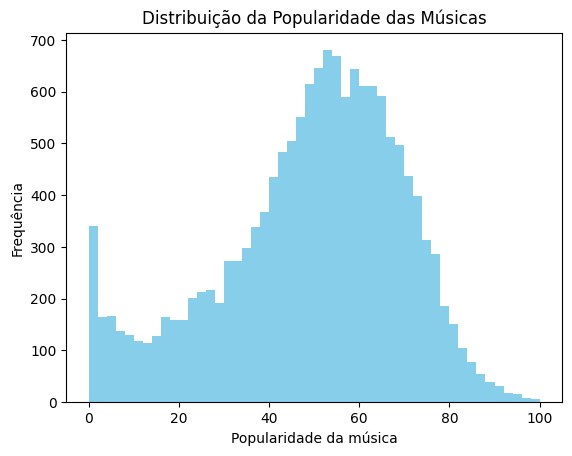

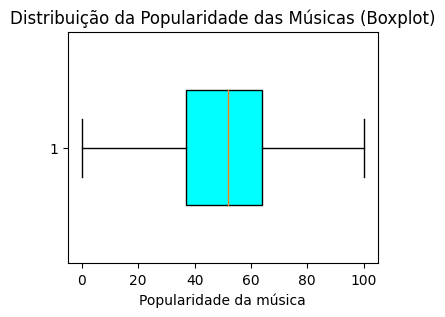

In [ ]:
# Remover linhas com valores nulos na coluna 'song_popularity'
df_2 = df.na.drop(subset=['song_popularity'])

# Converter a coluna do DataFrame do PySpark em um array do NumPy
song_popularity_array = np.array(df_2.select('song_popularity').collect())

# Criar um histograma do array do NumPy
plt.hist(song_popularity_array, bins=50, color='skyblue')
plt.xlabel('Popularidade da música')
plt.ylabel('Frequência')
plt.title('Distribuição da Popularidade das Músicas')


# Selecionar a coluna 'song_popularity' do DataFrame
song_popularity_col = df_2.select(F.col('song_popularity')).toPandas()['song_popularity']

# Criar um boxplot
plt.figure(figsize=(4, 3))
plt.boxplot(song_popularity_col, vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='cyan'))
plt.xlabel('Popularidade da música')
plt.title('Distribuição da Popularidade das Músicas (Boxplot)')

# Exibir
plt.show()


A popularidade das músicas parece ter uma distribuição Gaussiana em torno de ~50.

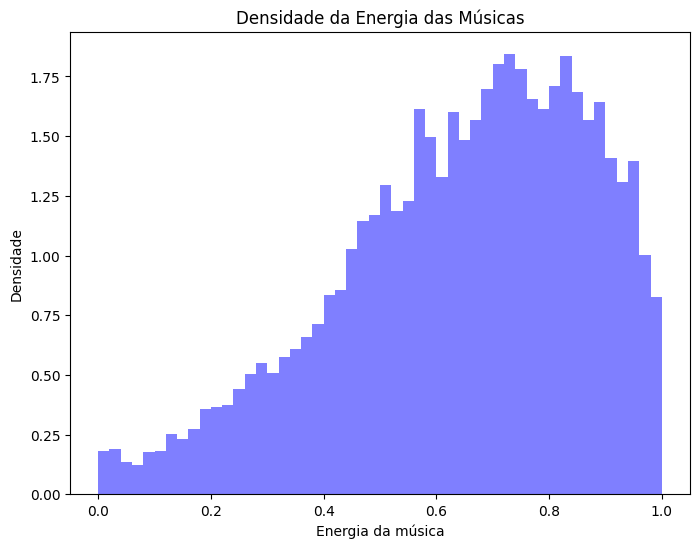

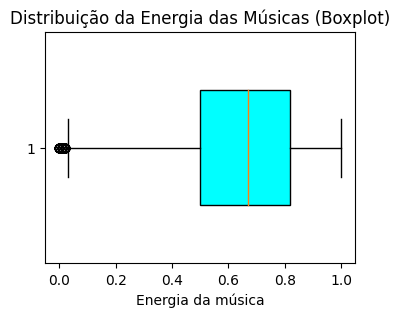

In [ ]:
# Selecionar a coluna 'energy' do DataFrame
energy_col = df.select(F.col('energy')).toPandas()['energy']

# Criar um gráfico de densidade
plt.figure(figsize=(8, 6))
plt.hist(energy_col, density=True, alpha=0.5, color='blue', bins=50)
plt.xlabel('Energia da música')
plt.ylabel('Densidade')
plt.title('Densidade da Energia das Músicas')
# Selecionar a coluna 'energy' do DataFrame
energy_col = df.select(F.col('energy')).toPandas()['energy']

# Criar um boxplot
plt.figure(figsize=(4, 3))
plt.boxplot(energy_col, vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='cyan'))
plt.xlabel('Energia da música')
plt.title('Distribuição da Energia das Músicas (Boxplot)')
plt.show()

A distribuição da energia é similar, mas deslocada para a direita, com outliers em zero.

In [ ]:
# Função para plotar gráfico de regressão linear
def plot_regression(col1, col2, df):
    # Criar um DataFrame temporário apenas com as duas colunas especificadas
    temp_df = df.select(col1, col2).toPandas()

    # Criar o gráfico de regressão linear com cores personalizadas
    sns.regplot(x=col1, y=col2, data=temp_df, scatter_kws={'color': 'skyblue', 'alpha': 0.7}, line_kws={'color': 'red'})

    # Calcular o coeficiente de correlação
    corr_coefficient = temp_df[col1].corr(temp_df[col2])

    # Configurar os rótulos dos eixos e o título do gráfico
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Correlação entre {col1} e {col2} (Regressão Linear)')

    # Exibir o coeficiente de correlação acima do gráfico
    plt.annotate(f'Coef. Corr.: {corr_coefficient:.2f}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center')

    # Exibir o gráfico
    plt.show()

In [ ]:
#from itertools import combinations

# # Lista de colunas a serem consideradas para o plot
# columns = ['song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']
,
# # Gerar todas as combinações possíveis de pares de colunas
# column_combinations = combinations(columns, 2)

# # Loop para criar o gráfico de regressão linear para cada par de colunas
# for col1, col2 in column_combinations:
#     plot_regression(col1, col2, df)


''

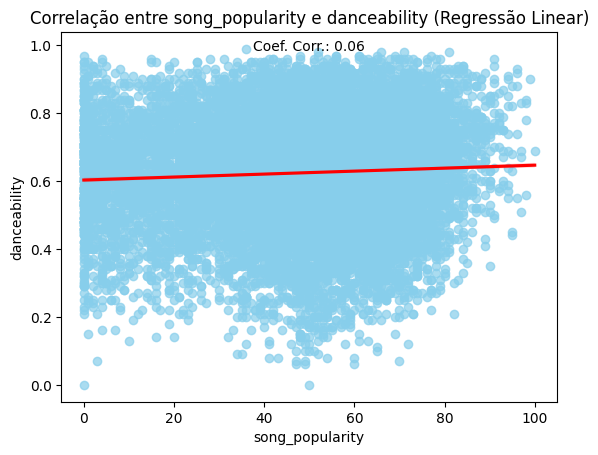

In [ ]:
plot_regression('song_popularity','danceability',df)

A correlação entre popularidade e danceabilidade é quase nula. A linha de tendência do gráfico de regressão linear é quase nula.

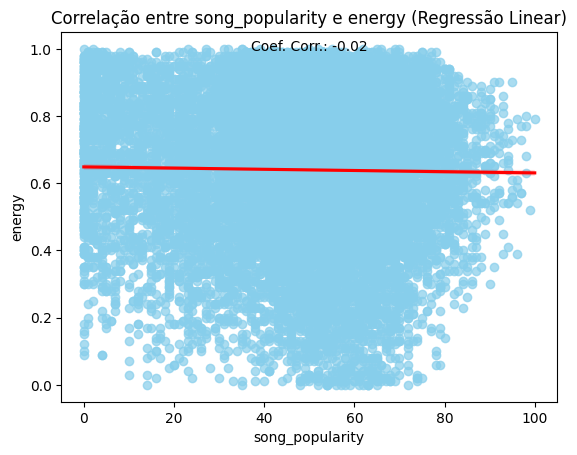

In [ ]:
plot_regression('song_popularity','energy',df)

A correlação entre popularidade e energia da música é quase nula.

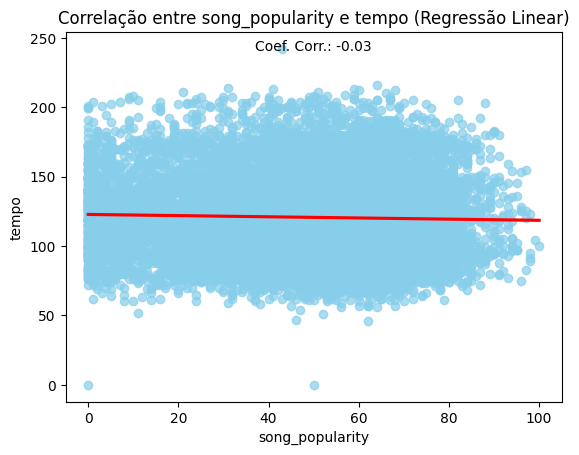

In [ ]:
plot_regression('song_popularity','tempo',df)

Idem para tempo em bpm e popularidade. A popularidade da música não parece depender dos bpms. A distribuição aqui é bastante uniforme entre 75 bmp e 175 bmp.

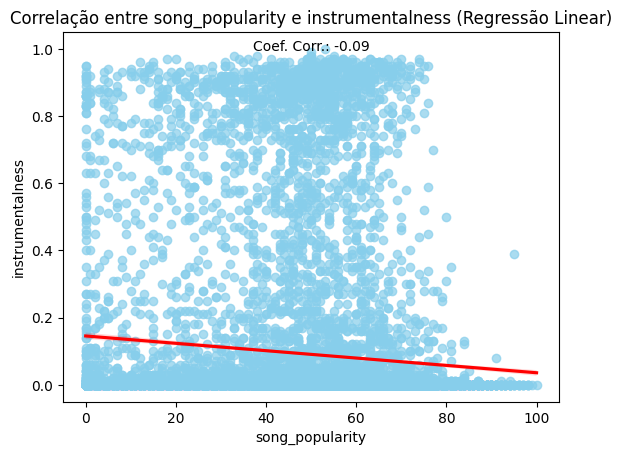

In [ ]:
plot_regression('song_popularity','instrumentalness',df)

Aqui salta aos olhos que músicas com alta instrumentalidade não passam de 80 de popularidade, enquanto músicas de menor índice não sofrem com essa barreira. No entanto, a correlação é baixa.